In [5]:
import pandas as pd
import warnings

# 取消提示警告
warnings.filterwarnings("ignore")

## 查看数据

In [7]:
# 读取数据
user_data = pd.read_csv('./工作/公众号用户访问数据.csv',encoding='utf-8')

In [8]:
# 查看数据
user_data

,用户编号,文章类别,阅读数,看一看,点赞,赞赏,被转载,访问日期
0,1,数据分析,20051,1203,2406,80,601,2020/9/21
1,2,数据分析,11690,584,1519,46,233,2020/9/17
2,3,数据分析,5720,400,572,45,228,2020/9/2
3,4,数据分析,22502,1125,3150,45,900,2020/9/24
4,5,数据分析,11201,560,1344,89,448,2020/9/8
...,...,...,...,...,...,...,...,...
194,98,pandas,7454,521,819,29,223,2020/9/20
195,98,pandas,7587,379,910,22,151,2020/9/20
196,99,数据分析,12179,852,1217,48,487,2020/9/23
197,99,pandas,11715,585,1288,46,351,2020/9/23


In [9]:
# 查看数据的基本信息
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户编号    199 non-null    int64 
 1   文章类别    199 non-null    object
 2   阅读数     199 non-null    int64 
 3   看一看     199 non-null    int64 
 4   点赞      199 non-null    int64 
 5   赞赏      199 non-null    int64 
 6   被转载     199 non-null    int64 
 7   访问日期    199 non-null    object
dtypes: int64(6), object(2)
memory usage: 12.6+ KB


In [10]:
# 查看data数据中的重复行
user_data[user_data.duplicated()]

,用户编号,文章类别,阅读数,看一看,点赞,赞赏,被转载,访问日期


In [11]:
user_data.describe()

,用户编号,阅读数,看一看,点赞,赞赏,被转载
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,58.884422,10430.989950,579.462312,1193.085427,51.743719,308.653266
std,26.263654,4911.958853,296.905636,577.234506,40.511623,175.735267
min,1.000000,2970.000000,132.000000,326.000000,3.000000,59.000000
25%,39.000000,6379.500000,364.500000,768.000000,19.500000,178.500000
50%,63.000000,9967.000000,536.000000,1106.000000,44.000000,271.000000
75%,79.500000,13377.000000,733.500000,1528.500000,70.500000,402.000000
max,99.000000,25402.000000,1778.000000,3556.000000,228.000000,1015.000000


In [12]:
user_data['文章类别'].value_counts()

数据分析          82
Python        47
爬虫            32
pandas        19
sql           10
matplotlib     9
Name: 文章类别, dtype: int64

In [13]:
user_data['访问日期'].value_counts()

2020/9/15    15
2020/9/21    13
2020/9/23    11
2020/9/13    10
2020/9/18    10
2020/9/26     9
2020/9/7      9
2020/9/30     8
2020/9/8      8
2020/9/6      8
2020/9/22     8
2020/9/12     8
2020/9/20     7
2020/9/27     7
2020/9/17     7
2020/9/24     7
2020/9/3      6
2020/9/10     6
2020/9/1      5
2020/9/16     5
2020/9/14     5
2020/9/5      5
2020/9/2      4
2020/9/9      4
2020/9/11     3
2020/9/29     3
2020/9/4      2
2020/9/25     2
2020/9/28     2
2020/9/19     2
Name: 访问日期, dtype: int64

## 数据处理

In [14]:
# 取出用户编号,文章类型、日期三列数据
analysis_data = user_data[['用户编号', '文章类别','访问日期']]

# 查看提取的数据
analysis_data

,用户编号,文章类别,访问日期
0,1,数据分析,2020/9/21
1,2,数据分析,2020/9/17
2,3,数据分析,2020/9/2
3,4,数据分析,2020/9/24
4,5,数据分析,2020/9/8
...,...,...,...
194,98,pandas,2020/9/20
195,98,pandas,2020/9/20
196,99,数据分析,2020/9/23
197,99,pandas,2020/9/23


In [15]:
# 定义“格式转换”函数
def conversion_data(category):

    # 判断文章类别是否已经转成了列表格式
    if str(category)[0] == '[':
        # 直接返回文章类别
        return category
    # 返回转成列表格式后的文章类别
    return [category]


# 获取'文章类别'列，调用 agg() 方法
analysis_data['文章类别'] = analysis_data['文章类别'].agg(conversion_data)
# 查看处理后的数据
analysis_data

,用户编号,文章类别,访问日期
0,1,[数据分析],2020/9/21
1,2,[数据分析],2020/9/17
2,3,[数据分析],2020/9/2
3,4,[数据分析],2020/9/24
4,5,[数据分析],2020/9/8
...,...,...,...
194,98,[pandas],2020/9/20
195,98,[pandas],2020/9/20
196,99,[数据分析],2020/9/23
197,99,[pandas],2020/9/23


In [16]:
# 根据'访问日期'和'用户编号'进行分组，并聚合'文章类别'列
adjusted_data = analysis_data.groupby(['访问日期', '用户编号']).sum()
# 查看整理后的数据
adjusted_data

文章类别
访问日期      用户编号                    
2020/9/1  20                [数据分析]
          44        [Python, 数据分析]
          60          [Python, 爬虫]
2020/9/10 14                [数据分析]
          47            [爬虫, 数据分析]
...                            ...
2020/9/8  28      [Python, Python]
          64    [Python, 爬虫, 数据分析]
          79         [Python, sql]
2020/9/9  46      [Python, Python]
          81         [Python, sql]

[99 rows x 1 columns]

## 数据分析
### 设置最小支持度为 0.1 ，使用默认最小置信度

In [17]:
# 导入 apyori 模块下的 apriori 函数
from apyori import apriori

# 提取'文章类别'列数据，调用apriori()函数，设置最小支持度为 0.1 ，使用默认最小置信度
results = apriori(adjusted_data['文章类别'], min_support=0.1)

# 遍历结果数据
for result in results:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
                continue

        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)

        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)

        # 查看强关联规则，支持度，置信度，提升度
        print(related_catogory, support, confidence, lift)

['Python']→['sql'] 0.101 0.233 2.302
['sql']→['Python'] 0.101 1.0 2.302
['Python']→['数据分析'] 0.323 0.744 0.91
['数据分析']→['Python'] 0.323 0.395 0.91
['Python']→['爬虫'] 0.141 0.326 1.04
['爬虫']→['Python'] 0.141 0.452 1.04
['pandas']→['数据分析'] 0.182 1.0 1.222
['数据分析']→['pandas'] 0.182 0.222 1.222
['数据分析']→['爬虫'] 0.192 0.235 0.749
['爬虫']→['数据分析'] 0.192 0.613 0.749


### 分析最小置信度

In [18]:
# 设置空的置信度列表
confidences_list = []

# 调用apriori()函数，生成关联规则
results = apriori(adjusted_data['文章类别'], min_support=0.1)

# 遍历统计列表中的关联规则，提取置信度
for result in results:
    for rule in result.ordered_statistics:

        # 获取前件并转成列表
        head_set = list(rule.items_base)

        # 跳过前件为空的数据
        if head_set == []:
                continue

        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)

        # 将置信度写入置信度列表
        confidences_list.append(confidence)
# 查看置信度列表
confidences_list

[0.233, 1.0, 0.744, 0.395, 0.326, 0.452, 1.0, 0.222, 0.235, 0.613]

In [19]:
# 提取关联规则的置信度，生成 Series 数据
s = pd.Series(confidences_list)
# 查看置信度的描述性统计信息
s.describe()

count    10.000000
mean      0.522000
std       0.303657
min       0.222000
25%       0.257750
50%       0.423500
75%       0.711250
max       1.000000
dtype: float64

In [20]:
# 对关联规则的置信度的 Series 数据进行排序
s.sort_values()

7    0.222
0    0.233
8    0.235
4    0.326
3    0.395
5    0.452
9    0.613
2    0.744
1    1.000
6    1.000
dtype: float64

### 设置最小支持度为 0.1 ，设置最小置信度 0.3

In [21]:
# 提取'文章类别'列数据，调用apriori()函数，设置最小支持度为 0.1 ，设置最小置信度 0.3
results = apriori(adjusted_data['文章类别'], min_support=0.1, min_confidence=0.3)

# 创建空列表，存储关联规则列表，形成嵌套列表
extract_result = []

for result in results:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
            continue

        # 将前件、后件拼接成关联规则的形式
        related_catogory = str(head_set) + '→' + str(tail_set)

        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)

        # 将提取的数据保存到提取列表中
        extract_result.append(
            [related_catogory, support, confidence, lift])

# 将数据转成 DataFrame 的形式
rules_data = pd.DataFrame(extract_result, columns=[
                            '关联规则', '支持度', '置信度', '提升度'])

# 将数据按照“支持度”排序
sorted_by_support = rules_data.sort_values(by='支持度')

# 查看排序后的数据
sorted_by_support

,关联规则,支持度,置信度,提升度
0,['sql']→['Python'],0.101,1.000,2.302
3,['Python']→['爬虫'],0.141,0.326,1.040
4,['爬虫']→['Python'],0.141,0.452,1.040
5,['pandas']→['数据分析'],0.182,1.000,1.222
6,['爬虫']→['数据分析'],0.192,0.613,0.749
1,['Python']→['数据分析'],0.323,0.744,0.910
2,['数据分析']→['Python'],0.323,0.395,0.910


In [22]:
# 提取出提升度大于1的数据，并重置数据的索引
promoted_rules = sorted_by_support[sorted_by_support['提升度'] > 1].reset_index(drop=True)

promoted_rules

,关联规则,支持度,置信度,提升度
0,['sql']→['Python'],0.101,1.000,2.302
1,['Python']→['爬虫'],0.141,0.326,1.040
2,['爬虫']→['Python'],0.141,0.452,1.040
3,['pandas']→['数据分析'],0.182,1.000,1.222


In [23]:
# 提取出提升度小于1的数据，并重置数据的索引
restricted_rules = sorted_by_support[sorted_by_support['提升度']<1].reset_index(drop=True)

restricted_rules

,关联规则,支持度,置信度,提升度
0,['爬虫']→['数据分析'],0.192,0.613,0.749
1,['Python']→['数据分析'],0.323,0.744,0.910
2,['数据分析']→['Python'],0.323,0.395,0.910


## 数据展现
### 画提升度大于 1 的关联规则的柱状图

Text(0, 0.5, '数值')

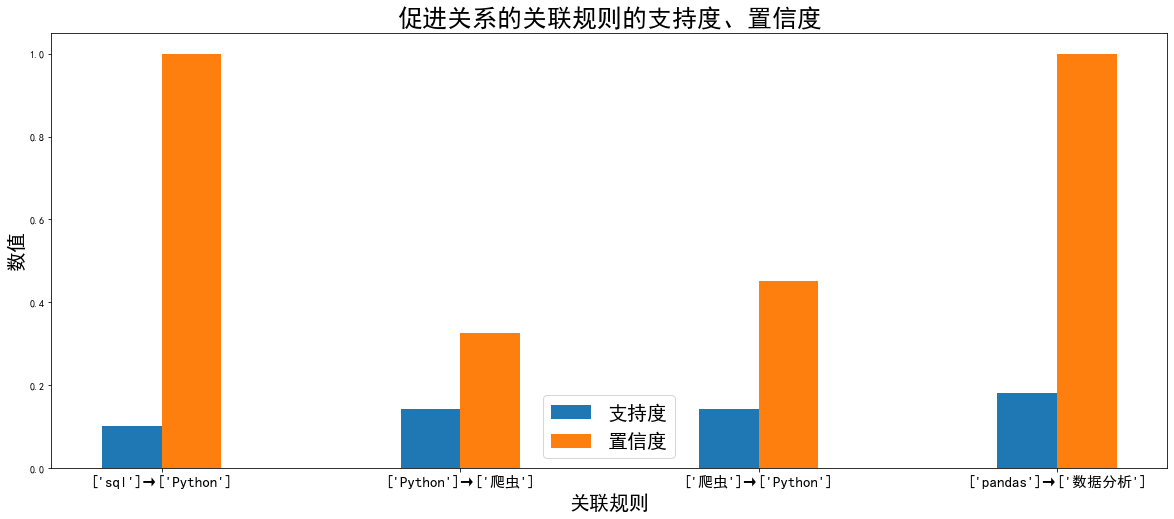

In [24]:
import matplotlib.pyplot as plt
import warnings

# 关闭警告显示
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 设置画布尺寸
plt.figure(figsize=(20, 8))

# 设置横纵坐标以及柱子的宽度
width = 0.2

# 画出柱状图
plt.bar(promoted_rules.index-width/2, promoted_rules['支持度'], width=width)
plt.bar(promoted_rules.index+width/2, promoted_rules['置信度'], width=width)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=20)
# 设置标题
plt.title('促进关系的关联规则的支持度、置信度', fontsize=25)
# 设置刻度名称
plt.xticks(promoted_rules.index, promoted_rules['关联规则'], fontsize=15)
# 设置坐标轴标签
plt.xlabel('关联规则', fontsize=20)
plt.ylabel('数值', fontsize=20)

### 画提升度小于 1 的关联规则的柱状图

Text(0, 0.5, '数值')

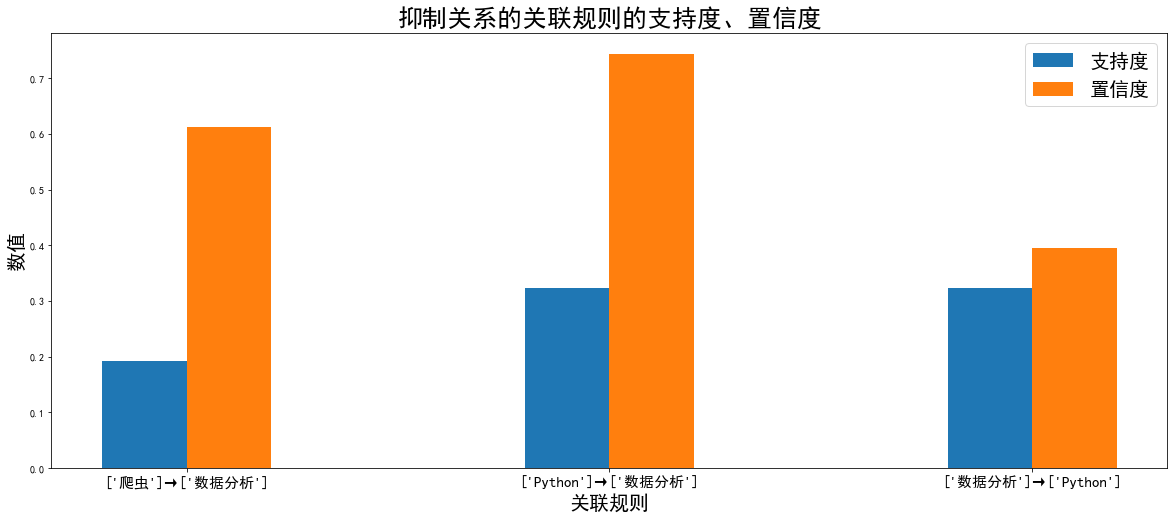

In [25]:
# 设置画布尺寸
plt.figure(figsize=(20, 8))

# 画出柱状图
plt.bar(restricted_rules.index-width/2, restricted_rules['支持度'], width=width)
plt.bar(restricted_rules.index+width/2, restricted_rules['置信度'], width=width)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=20)
# 设置标题
plt.title('抑制关系的关联规则的支持度、置信度', fontsize=25)
# 设置刻度名称
plt.xticks(restricted_rules.index, restricted_rules['关联规则'], fontsize=15)
# 设置坐标轴标签
plt.xlabel('关联规则', fontsize=20)
plt.ylabel('数值', fontsize=20)

### 所有强关联规则的提升度柱状图

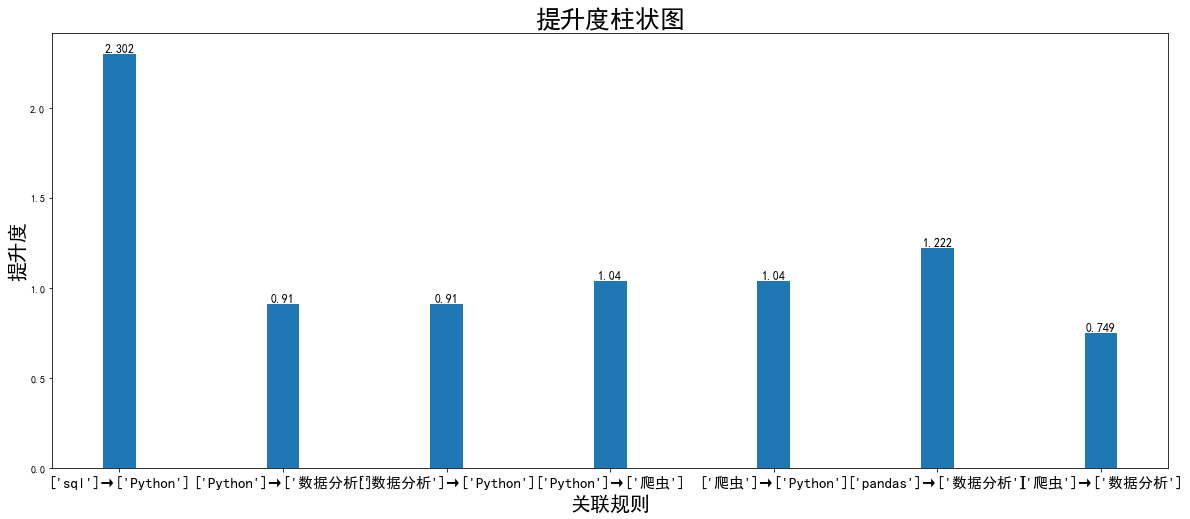

In [26]:
# 设置画布尺寸
plt.figure(figsize=(20, 8))

# 画出柱状图
plt.bar(sorted_by_support.index, sorted_by_support['提升度'], width=width)
# 设置标题
plt.title('提升度柱状图', fontsize=25)
# 设置刻度名称
plt.xticks(sorted_by_support.index, sorted_by_support['关联规则'], fontsize=15)

# 设置坐标轴标签
plt.xlabel('关联规则', fontsize=20)
plt.ylabel('提升度', fontsize=20)

# 设置数据标签
for a, b in zip(sorted_by_support.index, sorted_by_support['提升度']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)